In [1]:
### Descriptive and Predictive Data Analysis, Visualizations in Python

#### Prepared by Kim Huong Nguyen (E-mail: hn13@brandeis.edu/ kim.ng0913@gmail.com)

##Dataset: loan data (credit-related variables of loan applicants)
##Modeling purpose: Build a classification model to identify risky loan applicants, based on a set of creditworthiness variables
##Machine Learning Methods: Support Vector Machine (SVM), Regularized SVC, Random Forest

In [2]:
## Call libraries:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import random
random.seed(100)
import warnings
warnings.filterwarnings('ignore')

In [3]:
###I. EDA - Exploratory Data Analysis of Loan_Data:

# Set working directory:
os.chdir('C:\\Users\\hn13\\Desktop\\loan_data')

# Read in Loan Data
df = pd.read_csv('loan_data.csv')

In [4]:
#Statistical Summary of Numeric Features:
df.describe()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 16,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 20,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 24,Credit Feature 25
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,810.342500,649.605600,0.343849,2969.050000,2.06540,1215.448600,785.937600,-3.448601,-12.854603,-20.344137,...,-6.215947,-25.403739,13.955588,-20.137933,4.125568,2.066714,5.389588,16.673444,-9.785409,-7.124774
std,294.347812,99.371631,0.172250,1156.850434,2.21766,441.512941,310.251092,10.298910,6.723383,4.535247,...,15.078868,6.267198,9.337610,16.537193,1.546755,6.641722,9.521323,9.128735,16.287092,4.036220
min,300.000000,274.000000,0.050000,1000.000000,0.00000,450.000000,186.000000,-9.507289,-16.167485,-24.090364,...,-15.027629,-31.865106,-25.938345,-31.477906,0.763831,-13.696389,-15.222717,-17.035774,-39.490282,-9.590430
25%,600.000000,582.000000,0.190000,2000.000000,0.00000,900.000000,576.000000,-8.661485,-14.778559,-21.937343,...,-13.915507,-28.877650,16.314005,-28.852982,3.644118,5.145040,9.815495,16.195269,-15.389340,-8.631625
50%,825.000000,649.000000,0.340000,3000.000000,1.00000,1237.000000,798.000000,-8.446555,-14.457715,-21.421917,...,-13.570082,-28.184127,16.976390,-28.174717,3.736082,5.353991,10.211275,16.613298,-15.014788,-8.424638
75%,950.000000,719.000000,0.490000,4000.000000,3.00000,1425.000000,934.000000,-8.111668,-14.118072,-20.793630,...,-13.039962,-27.018763,17.401889,-27.065965,3.849536,5.491239,10.464566,17.116157,-14.554285,-8.089185
max,1500.000000,850.000000,0.640000,4900.000000,14.00000,2250.000000,2068.000000,21.313702,15.936849,-1.782755,...,29.951746,-10.405015,19.046481,17.473050,8.213498,6.000452,11.575501,31.735782,28.873656,9.770336


In [5]:
# Checking N/A or Missing Values:
df.isnull().sum()
# There is no missing or N/A values in loan_data set

State                  0
Amount                 0
FICO                   0
DTI                    0
Net Income             0
Home Ownership         0
Open Trades            0
Scheduled Repayment    0
Loan Repayment         0
Credit Feature 1       0
Credit Feature 2       0
Credit Feature 3       0
Credit Feature 4       0
Credit Feature 5       0
Credit Feature 6       0
Credit Feature 7       0
Credit Feature 8       0
Credit Feature 9       0
Credit Feature 10      0
Credit Feature 11      0
Credit Feature 12      0
Credit Feature 13      0
Credit Feature 14      0
Credit Feature 15      0
Credit Feature 16      0
Credit Feature 17      0
Credit Feature 18      0
Credit Feature 19      0
Credit Feature 20      0
Credit Feature 21      0
Credit Feature 22      0
Credit Feature 23      0
Credit Feature 24      0
Credit Feature 25      0
dtype: int64

Text(0.5,1,'Box Plot of FICO by States')

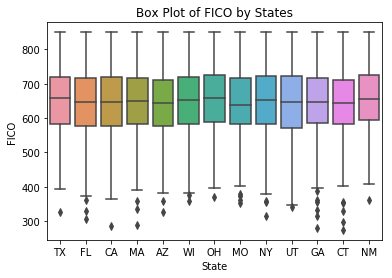

In [6]:
# What is the variation of FICO score across States?

sns.boxplot(x='State', y='FICO', data=df).set_title('Box Plot of FICO by States')

In [7]:
# Which State has Minimum FICO score?

df.groupby('State')['FICO'].aggregate({'Min FICO':np.min, 'Max FICO':np.max, 'Mean FICO':np.mean, 'Median': np.median, 'Sd FICO':np.std,}).sort_values('Min FICO', ascending=True)

,Min FICO,Max FICO,Mean FICO,Median,Sd FICO
State,,,,,
CT,274,850,645.791614,645,99.825228
GA,281,850,648.217503,648,98.990824
CA,285,850,646.989924,646,101.354496
MA,287,850,649.071895,649,98.508916
FL,305,850,647.199516,647,100.911236
NY,316,850,652.686763,654,102.021202
AZ,326,850,642.740891,643,97.860368
TX,326,850,653.046599,658,96.127210
UT,340,850,647.416089,648,104.901191


Text(0.5,1,'Box Plot of Open Trades by States')

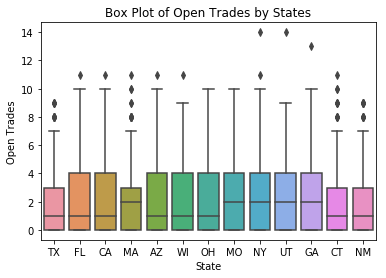

In [8]:
# What is the Variations in the Number of Open Trades across States?

sns.boxplot(x='State', y='Open Trades', data=df).set_title('Box Plot of Open Trades by States')

In [9]:
#Which State has the largest loan Amount?

amount_by_state=df.groupby('State')['Amount'].aggregate({'Total loan':np.sum, 'Mean loan':np.mean,'Min loan':np.min, 'Max loan':np.max,'Sd loan':np.std, 'Total borrowers': np.size}).sort_values('Total loan', ascending=False)
amount_by_state= amount_by_state.reset_index()
print(amount_by_state)

   State  Total loan   Mean loan  Min loan  Max loan     Sd loan  \
0     FL      674775  815.931076       300      1500  301.156936   
1     TX      645900  813.476071       300      1500  299.391577   
2     MO      643300  809.182390       300      1500  295.485487   
3     CA      638025  803.557935       300      1500  293.069535   
4     CT      633475  804.923761       300      1500  292.022419   
5     NY      623825  817.595020       300      1500  297.232780   
6     MA      622725  814.019608       300      1500  294.551893   
7     GA      614975  791.473616       300      1500  283.440951   
8     WI      614875  807.982917       300      1500  292.321423   
9     NM      608550  821.255061       300      1500  307.620516   
10    AZ      595150  803.171390       300      1500  291.237567   
11    OH      594925  810.524523       300      1500  290.948777   
12    UT      592925  822.364771       300      1500  287.397308   

    Total borrowers  
0               827  
1  

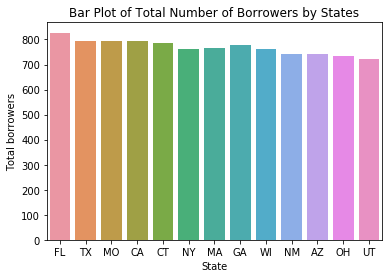

In [10]:
# Plot total number of borrowers by States:

ax = sns.barplot(x="State", y="Total borrowers", data=amount_by_state).set_title('Bar Plot of Total Number of Borrowers by States')

In [11]:
# Statistical Summry of Total Loan Amount by States:

amount_by_state=df.groupby('State')['Amount'].aggregate({'Total loan':np.sum, 'Total borrowers': np.size, 'Mean loan':np.mean, 'Min loan':np.min, 'Max loan':np.max, 'Sd loan':np.std}).sort_values('Total loan', ascending=False)
amount_by_state= amount_by_state.reset_index()
print(amount_by_state)

   State  Total loan  Total borrowers   Mean loan  Min loan  Max loan  \
0     FL      674775              827  815.931076       300      1500   
1     TX      645900              794  813.476071       300      1500   
2     MO      643300              795  809.182390       300      1500   
3     CA      638025              794  803.557935       300      1500   
4     CT      633475              787  804.923761       300      1500   
5     NY      623825              763  817.595020       300      1500   
6     MA      622725              765  814.019608       300      1500   
7     GA      614975              777  791.473616       300      1500   
8     WI      614875              761  807.982917       300      1500   
9     NM      608550              741  821.255061       300      1500   
10    AZ      595150              741  803.171390       300      1500   
11    OH      594925              734  810.524523       300      1500   
12    UT      592925              721  822.364771  

In [12]:
# What is the proportion of "Own" and "Rent" in 'Home Ownership' at State-level:

df.groupby(['State','Home Ownership'])['FICO'].aggregate({'count'})

count
State Home Ownership       
AZ    Own               384
      Rent              357
CA    Own               412
      Rent              382
CT    Own               394
      Rent              393
FL    Own               394
      Rent              433
GA    Own               385
      Rent              392
MA    Own               372
      Rent              393
MO    Own               409
      Rent              386
NM    Own               355
      Rent              386
NY    Own               359
      Rent              404
OH    Own               380
      Rent              354
TX    Own               404
      Rent              390
UT    Own               364
      Rent              357
WI    Own               393
      Rent              368

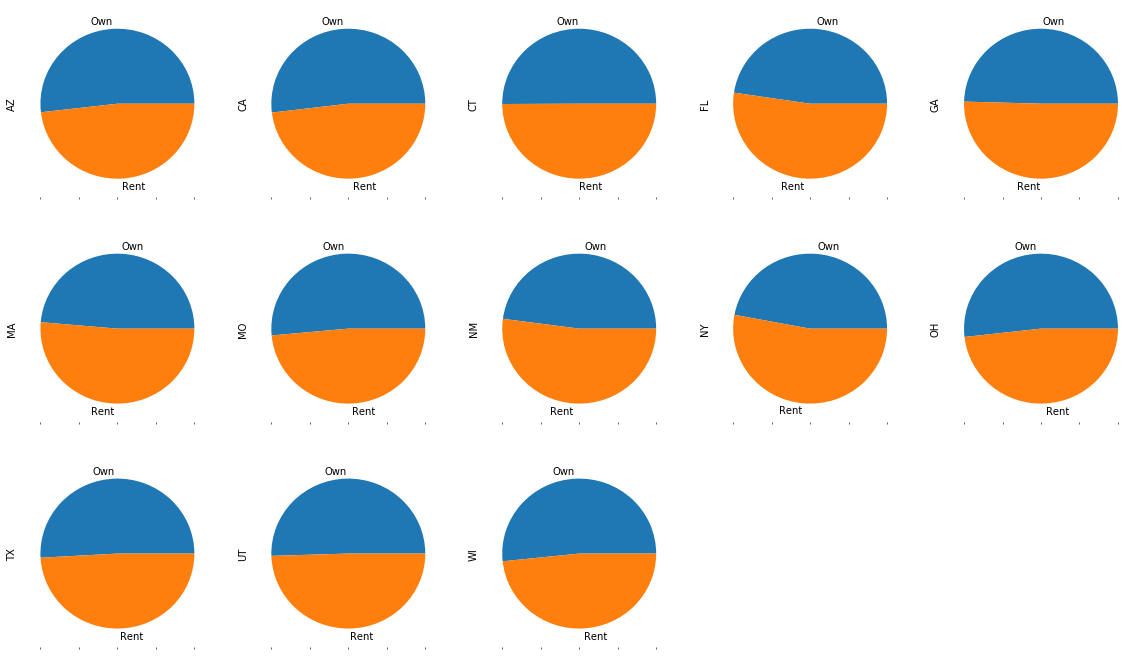

In [13]:
state_home_ownership = df.groupby(['State','Home Ownership'])['FICO'].aggregate({'count'})
state_home_ownership.unstack().T.plot.pie(subplots=True,figsize=(20, 20),layout=(5,5),legend=False, labels=['Own','Rent']);


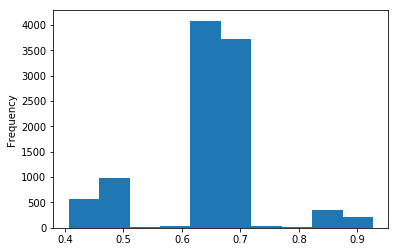

In [14]:
### II. MODELING
### Data Preprocessing for Model Building:

## Feature Engineering - Derive continous risk indicator - Response Variable (Y):
df['Numeric Response'] = df['Loan Repayment']/ df['Scheduled Repayment']

data =df 

#Distribution of Response Variable Y
data['Numeric Response'].plot.hist()

# The higher the response variable (Y) the more risky the loan applicant is

In [15]:
# Compute correlation matrix between Numeric Response Variable (Y) and other continuous variables
corr = data.corr()
corr.head(5)

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 20,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 24,Credit Feature 25,Numeric Response
Amount,1.000000,-0.001962,-0.009939,0.005222,0.005360,1.000000,0.924080,-0.013699,-0.000829,-0.001843,...,-0.012357,0.003316,-0.012883,-0.011745,0.013450,0.012642,-0.006991,-0.011454,-0.004316,0.011841
FICO,-0.001962,1.000000,0.005991,-0.007756,0.009336,-0.001961,0.002653,0.005114,0.014279,0.012159,...,0.002560,-0.014435,0.005980,-0.005451,-0.006725,-0.009666,-0.010973,-0.003386,0.014154,0.010730
DTI,-0.009939,0.005991,1.000000,-0.004800,-0.000876,-0.009938,-0.013886,0.007804,0.000138,0.002098,...,0.006517,-0.002005,0.008613,0.007449,-0.007689,-0.006964,0.003717,0.007595,0.001298,-0.005771
Net Income,0.005222,-0.007756,-0.004800,1.000000,-0.000197,0.005222,-0.000132,0.008447,-0.008261,-0.006444,...,0.009844,0.006228,0.006891,0.013802,-0.008120,-0.004685,0.013022,0.013142,-0.005167,-0.015766
Open Trades,0.005360,0.009336,-0.000876,-0.000197,1.000000,0.005360,0.014613,-0.021375,0.018371,0.018567,...,-0.019958,-0.012011,-0.019217,-0.031300,0.019135,0.012011,-0.029445,-0.030520,0.011835,0.029892


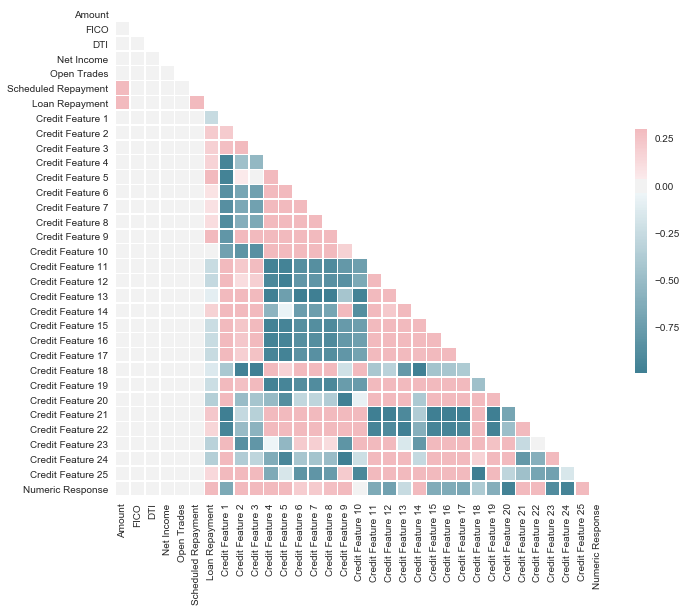

In [16]:
# Plot Correlation Matrix of the whole dataset:

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [17]:
## Categorical Variable Coding:
# Remove "State" variable from the dataset:

data_1 = data.drop(['State'],1)

# One hot encoding for categorical variable: Home.Ownership

data_1 = pd.get_dummies(data_1)
data_1.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 19,Credit Feature 20,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 24,Credit Feature 25,Numeric Response,Home Ownership_Own,Home Ownership_Rent
0,1000,650,0.16,3200,0,1500,712,19.761875,-13.781655,-20.453486,...,16.194477,7.325795,-12.378305,-12.735145,28.054636,26.551606,-5.704108,0.474667,0,1
1,600,691,0.15,3500,0,900,413,18.946381,-14.940162,-20.552343,...,15.747176,7.336176,-12.081557,-12.177230,28.975810,28.873656,-5.853390,0.458889,1,0
2,1500,550,0.44,1700,0,2250,1092,18.802652,-13.865113,-21.465582,...,15.894344,7.175428,-12.340872,-12.361400,28.919406,27.773958,-5.937717,0.485333,0,1
3,1500,698,0.30,1500,0,2250,1099,19.205639,-14.252900,-20.784594,...,16.478486,7.371524,-12.702267,-13.029824,29.490039,26.222097,-5.783237,0.488444,0,1
4,875,661,0.57,3400,3,1312,637,20.194782,-14.600056,-19.458587,...,16.350261,7.911082,-12.146292,-12.830572,28.622197,25.320528,-5.763184,0.485518,0,1


In [18]:
## Feature Engineering:

# Convert numeric Respose variable to two-level factor variable with a threshold of 0.665
threshold = 0.665 # This cutoff value is intentionally chosen to create a balanced set of between binary outcome "High Risk" and "Low Risk", and avoid the problem of imbalance classes that can lower classification performance of the model.

data_1['Binary Response'] = np.where(data_1['Numeric Response'] >= threshold, '1', '0')

# Binaray Response - "1" indicates that the loan applicant is classified as "High Risk"; Binary Response - '0' means "Low Risk"

data_1.head(5)

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 20,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 24,Credit Feature 25,Numeric Response,Home Ownership_Own,Home Ownership_Rent,Binary Response
0,1000,650,0.16,3200,0,1500,712,19.761875,-13.781655,-20.453486,...,7.325795,-12.378305,-12.735145,28.054636,26.551606,-5.704108,0.474667,0,1,0
1,600,691,0.15,3500,0,900,413,18.946381,-14.940162,-20.552343,...,7.336176,-12.081557,-12.177230,28.975810,28.873656,-5.853390,0.458889,1,0,0
2,1500,550,0.44,1700,0,2250,1092,18.802652,-13.865113,-21.465582,...,7.175428,-12.340872,-12.361400,28.919406,27.773958,-5.937717,0.485333,0,1,0
3,1500,698,0.30,1500,0,2250,1099,19.205639,-14.252900,-20.784594,...,7.371524,-12.702267,-13.029824,29.490039,26.222097,-5.783237,0.488444,0,1,0
4,875,661,0.57,3400,3,1312,637,20.194782,-14.600056,-19.458587,...,7.911082,-12.146292,-12.830572,28.622197,25.320528,-5.763184,0.485518,0,1,0


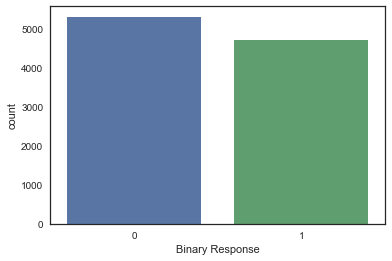

In [19]:
# Bar plot of frequency of binary response variable to check whether the dataset is balanced or not?
sns.countplot(data_1['Binary Response'], label = "Count") 

In [20]:
## Remove columns that are not needed for model training:

# Drop fields that are nearly perfect correlated with Response Variable (correlation coefficient > absolute(0.9))
# Credit Feature 9, 20, 24 has correlation coefficient with Numeric Response Variable greater than absolute (0.9)

data_2= data_1.drop(columns = ['Credit Feature 9', 'Credit Feature 20', 'Credit Feature 24'])

data_2.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 18,Credit Feature 19,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 25,Numeric Response,Home Ownership_Own,Home Ownership_Rent,Binary Response
0,1000,650,0.16,3200,0,1500,712,19.761875,-13.781655,-20.453486,...,10.973646,16.194477,-12.378305,-12.735145,28.054636,-5.704108,0.474667,0,1,0
1,600,691,0.15,3500,0,900,413,18.946381,-14.940162,-20.552343,...,11.247021,15.747176,-12.081557,-12.177230,28.975810,-5.853390,0.458889,1,0,0
2,1500,550,0.44,1700,0,2250,1092,18.802652,-13.865113,-21.465582,...,10.560173,15.894344,-12.340872,-12.361400,28.919406,-5.937717,0.485333,0,1,0
3,1500,698,0.30,1500,0,2250,1099,19.205639,-14.252900,-20.784594,...,11.140559,16.478486,-12.702267,-13.029824,29.490039,-5.783237,0.488444,0,1,0
4,875,661,0.57,3400,3,1312,637,20.194782,-14.600056,-19.458587,...,11.464980,16.350261,-12.146292,-12.830572,28.622197,-5.763184,0.485518,0,1,0


In [21]:
## Remove columns that are not needed for model training:

# Drop field: Numeric Response from modeling dataset:

data_3 = data_2.drop(['Numeric Response'],1)
data_3.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 25,Home Ownership_Own,Home Ownership_Rent,Binary Response
0,1000,650,0.16,3200,0,1500,712,19.761875,-13.781655,-20.453486,...,-11.792545,10.973646,16.194477,-12.378305,-12.735145,28.054636,-5.704108,0,1,0
1,600,691,0.15,3500,0,900,413,18.946381,-14.940162,-20.552343,...,-11.636291,11.247021,15.747176,-12.081557,-12.177230,28.975810,-5.853390,1,0,0
2,1500,550,0.44,1700,0,2250,1092,18.802652,-13.865113,-21.465582,...,-11.198035,10.560173,15.894344,-12.340872,-12.361400,28.919406,-5.937717,0,1,0
3,1500,698,0.30,1500,0,2250,1099,19.205639,-14.252900,-20.784594,...,-11.501877,11.140559,16.478486,-12.702267,-13.029824,29.490039,-5.783237,0,1,0
4,875,661,0.57,3400,3,1312,637,20.194782,-14.600056,-19.458587,...,-12.260523,11.464980,16.350261,-12.146292,-12.830572,28.622197,-5.763184,0,1,0


In [22]:
## MODEL TRAINING:
# Extract Binary Variable from dataset:
y = data_3['Binary Response']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Binary Response, dtype: object

In [23]:
# Drop the binary response variable column
X = data_3.drop(['Binary Response'],axis=1)
X.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 16,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 25,Home Ownership_Own,Home Ownership_Rent
0,1000,650,0.16,3200,0,1500,712,19.761875,-13.781655,-20.453486,...,27.190627,-11.792545,10.973646,16.194477,-12.378305,-12.735145,28.054636,-5.704108,0,1
1,600,691,0.15,3500,0,900,413,18.946381,-14.940162,-20.552343,...,26.382313,-11.636291,11.247021,15.747176,-12.081557,-12.177230,28.975810,-5.853390,1,0
2,1500,550,0.44,1700,0,2250,1092,18.802652,-13.865113,-21.465582,...,28.228077,-11.198035,10.560173,15.894344,-12.340872,-12.361400,28.919406,-5.937717,0,1
3,1500,698,0.30,1500,0,2250,1099,19.205639,-14.252900,-20.784594,...,27.718416,-11.501877,11.140559,16.478486,-12.702267,-13.029824,29.490039,-5.783237,0,1
4,875,661,0.57,3400,3,1312,637,20.194782,-14.600056,-19.458587,...,28.512342,-12.260523,11.464980,16.350261,-12.146292,-12.830572,28.622197,-5.763184,0,1


In [24]:
## MODEL TRAINING:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5)

In [25]:
X_train.shape


(7000, 31)

In [26]:
X_test.shape

(3000, 31)

In [27]:
y_train.shape

(7000,)

In [28]:
y_test.shape

(3000,)

In [29]:
## Train the Model with Support Vector Machine:
 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
### Model Performance Evaluation:

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [31]:
# Plot Confusion Matrix for SVC

import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1574    3]
 [1377   46]]


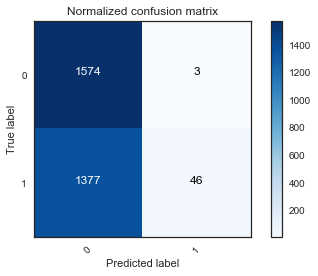

In [32]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=False,title='Normalized confusion matrix')

Normalized confusion matrix
[[0.99809765 0.00190235]
 [0.96767393 0.03232607]]


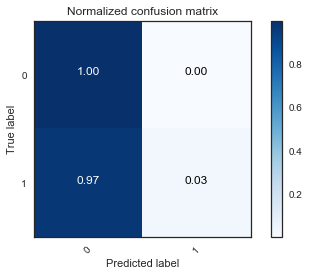

In [33]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=True,title='Normalized confusion matrix')

In [34]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.53      1.00      0.70      1577
          1       0.94      0.03      0.06      1423

avg / total       0.73      0.54      0.40      3000



In [35]:
### SVC Model Perforamance Improvement: Normalization
# Feature Standardization on training set: (Z-score) Normalization
mean_train = X_train.mean()

In [36]:
std_train = X_train.std()

In [37]:
X_train_scaled = (X_train - mean_train)/std_train
X_train_scaled.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 16,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 25,Home Ownership_Own,Home Ownership_Rent
2926,1.335039,1.579499,0.965495,-0.055104,-0.033382,1.335213,1.357179,-0.557356,-0.146790,-0.097670,...,-0.537685,-0.418439,0.369308,-0.487441,0.561120,0.486027,-0.032012,-0.483356,1.001072,-1.001072
4634,-0.709636,1.448351,0.849399,1.246275,1.319937,-0.709504,-0.471031,-0.514808,-0.318631,-0.042019,...,-0.504709,-0.753649,0.271300,-0.569450,0.487774,0.520369,-0.058394,-0.380202,1.001072,-1.001072
416,0.653481,0.439520,-0.717895,1.333033,0.868830,0.653641,-0.250608,2.257416,-0.250308,-0.127182,...,2.240608,2.161763,-0.280720,2.210299,-2.239386,-1.877038,1.289739,0.303476,1.001072,-1.001072
6369,-0.198467,0.449609,-1.240327,-0.141863,0.417724,-0.198325,-0.114465,-0.481029,-0.240417,-0.034997,...,-0.482561,-0.610055,0.236452,-0.476020,0.475109,0.550610,-0.107439,-0.360113,-0.998786,0.998786
7952,-1.050415,0.167136,-1.588614,-1.182966,-0.935594,-1.050291,-0.954015,-0.521269,-0.095023,-0.188291,...,-0.484189,-0.347504,0.382011,-0.515099,0.530683,0.525317,0.011676,-0.321322,1.001072,-1.001072


In [38]:
# Feature Standardization on test set: (Z-score) Normalization
mean_test = X_test.mean()
std_test = X_test.std()
X_test_scaled = (X_test - mean_test)/std_test
X_test_scaled.head()

,Amount,FICO,DTI,Net Income,Open Trades,Scheduled Repayment,Loan Repayment,Credit Feature 1,Credit Feature 2,Credit Feature 3,...,Credit Feature 16,Credit Feature 17,Credit Feature 18,Credit Feature 19,Credit Feature 21,Credit Feature 22,Credit Feature 23,Credit Feature 25,Home Ownership_Own,Home Ownership_Rent
7054,0.032891,0.370054,-0.431174,0.701125,-0.921335,0.031917,0.130260,-0.485479,-0.312501,-0.272313,...,-0.536215,-0.422517,0.406460,-0.469622,0.522734,0.590778,-0.045939,-0.365941,0.993852,-0.993852
442,0.201562,0.430078,-1.185989,-1.098756,-0.921335,0.200591,-0.665237,2.400657,-0.300689,0.058176,...,2.244621,2.287459,-0.346080,2.217275,-2.272030,-1.933255,1.415005,0.322063,-1.005850,1.005850
3954,-1.400815,0.860246,1.252645,-0.327378,1.330951,-1.400690,-1.199811,-0.485118,-0.181540,-0.309410,...,-0.499028,-0.470430,0.280239,-0.533511,0.460480,0.493608,-0.078414,-0.474279,-1.005850,1.005850
2288,0.454569,-0.530297,1.659084,-0.241670,-0.921335,0.454727,0.553464,-0.420476,-0.290270,-0.440040,...,-0.474681,-0.613868,0.350967,-0.530576,0.475345,0.542608,-0.014222,-0.452494,-1.005850,1.005850
3196,0.623241,-1.370625,0.555892,-0.070252,-0.921335,0.623402,0.811205,-0.479748,-0.296744,-0.306197,...,-0.434537,-0.390464,0.259137,-0.486948,0.472999,0.488670,-0.121081,-0.300116,-1.005850,1.005850


In [39]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[1283  294]
 [ 101 1322]]


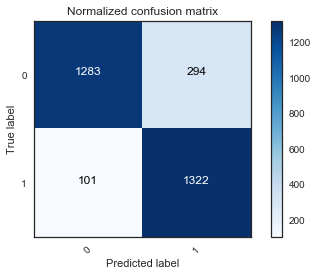

In [40]:
y_predict = svc_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_predict)

# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=False,title='Normalized confusion matrix')

Normalized confusion matrix
[[0.81357007 0.18642993]
 [0.07097681 0.92902319]]


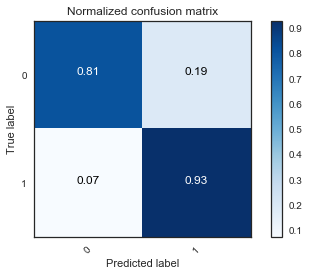

In [41]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=True,title='Normalized confusion matrix')

In [42]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87      1577
          1       0.82      0.93      0.87      1423

avg / total       0.88      0.87      0.87      3000



In [43]:
## MODEL TUNING: Regularized Support Vector Classifications:

## Grid Search Cross Validation to find the Optimal Hyper-parameters:

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [46]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5338474721508141, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5357908272610373, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5375053579082726, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6272493573264781, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6305186455207887, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6189455636519503, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6242502142245073, total=   1.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6305186455207887, total=   1.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6189455636519503, total=   1.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6242502142245073, total=   1.4s
[CV] C=0.1, gamma=0.001, kernel=rbf .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [58]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [59]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
grid_predictions = grid.predict(X_test_scaled)

In [61]:
cm = confusion_matrix(y_test, grid_predictions)

Confusion matrix, without normalization
[[1551   26]
 [  98 1325]]


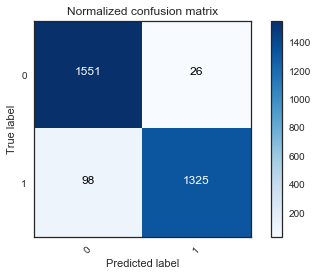

In [62]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=False,title='Normalized confusion matrix')

Normalized confusion matrix
[[0.983513   0.016487  ]
 [0.06886859 0.93113141]]


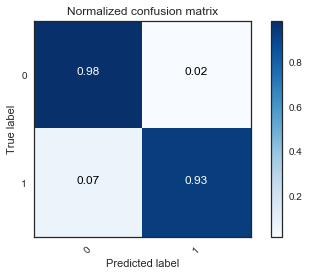

In [63]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=[0,1], normalize=True,title='Normalized confusion matrix')

In [64]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1577
          1       0.98      0.93      0.96      1423

avg / total       0.96      0.96      0.96      3000



In [65]:
### Model Training, using Random Forest Classifiers:

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)


In [66]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
y_pred = random_forest.predict(X_test)

In [68]:
random_forest.score(X_test,y_test)

0.769

In [69]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[1156  421]
 [ 272 1151]]


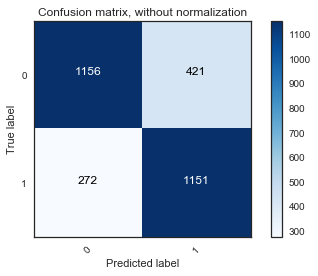

In [70]:
# Plot non-normalized confusion matrix for Random Forest Classifier
plot_confusion_matrix(cnf_matrix,classes=[0,1], title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.73303741 0.26696259]
 [0.19114547 0.80885453]]


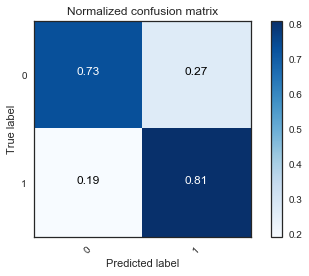

In [71]:
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,title='Normalized confusion matrix')

In [72]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.73      0.77      1577
          1       0.73      0.81      0.77      1423

avg / total       0.77      0.77      0.77      3000



In [74]:
## Concluding Remarks on the Best Model: Support Vector Machine (SVM) and Random Forest (RF)

# The regularized Support Vector Classifier is the best model because its average precision, recall and f1-score are significantly high at 96%, which outperforms the metrics of Random Forest and SVC without regularization at only 78% and 88% respectively.
# Since our classification model focuses on classifying the risky loan applicants (target variable =1), the precision (percent of predicted 1s that are actually 1s) and recall (percent of actually 1s correctly predicted/classified) are the most important metrics to evaluate model performance.